<a href="https://colab.research.google.com/github/agungadi/UAS_PCVK/blob/main/PROJEK_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


## 1. Seleksi Bacteria yang sempurna

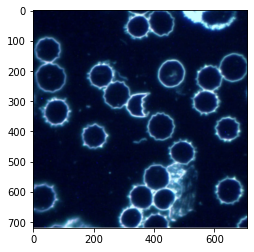

In [ ]:
#memanggil lib opencv yanng berfungsi pengolahan citra
import cv2
#untuk visualisasi data disini digunakan untuk menampilkan foto beserta bingkai ukuran pixelnya.
from matplotlib import pyplot as plt
import numpy as np

# where you stored image
image_origin = cv2.imread("/content/drive/MyDrive/Polinema/PCVK/Images/project/001.png")
image_origin = cv2.cvtColor(image_origin,cv2.COLOR_BGR2RGB)
image_contorus = image_origin.copy()
image_to_process = image_origin.copy()
plt.imshow(image_contorus)


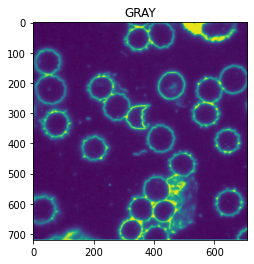

In [ ]:
# memisahkan antara objek foreground dan background
img_grey = cv2.cvtColor(image_to_process,cv2.COLOR_BGR2GRAY)
plt.title('GRAY')
plt.imshow(img_grey)


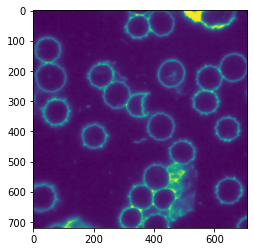

In [ ]:
## Operasi ini membuat objek pada suatu citra menjadi lebih kecil atau tipis
# image_erosi
#kernel ini apabila 5,5 berarti operasi erosinya hanya mencakup 5 pixel jika 50 pixel
kernel = np.ones((5,5), np.uint8)
erosion = cv2.morphologyEx(img_grey,cv2.MORPH_ERODE, kernel)
cv2.imwrite("image_erosion.png",erosion)
plt.imshow(erosion)


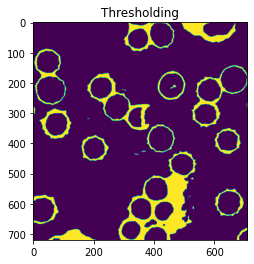

In [ ]:
#untuk merubah backgorund manjadi warna gelap dan foreground menjadi warna terang.
#jika pixel img lebih besar dari 0 maka tresh berinilai hitam,
#otsu melakukan segmentasi pixel menjadi dua kelas, yaitu foreground dan background
ret3,th3 = cv2.threshold(erosion,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('Thresholding')
plt.imshow(th3)


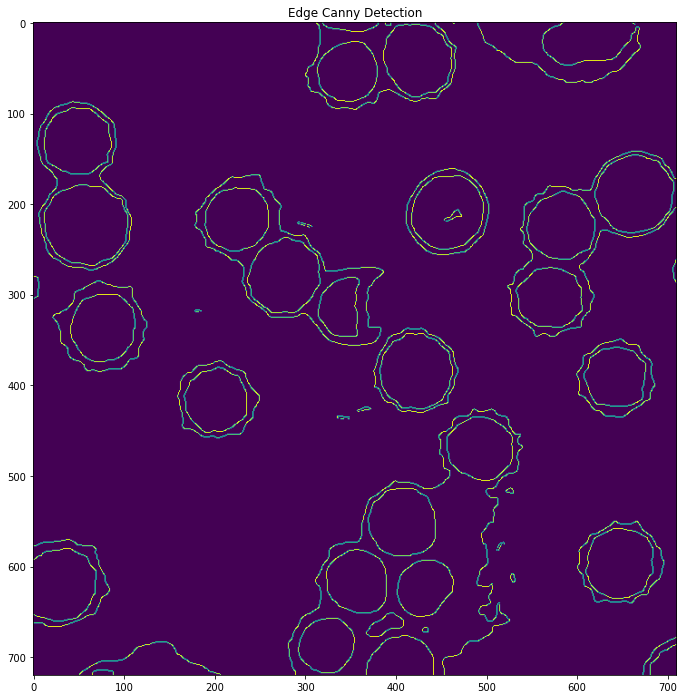

In [ ]:
# edge detection bertujuan untuk mencari titik tepi pada pixel garis kemudian disambukan tepi yang patah menggunakan tressholding.
#karena diatas sudah dilakukan treshold maka pada nilai treshold disini hanya sebagai parameter tidak memiliki pengaruh sehingga apapun nilainya akan tetap sama hasilnya karena gambar sudah hitam dan teran.
image_edge = cv2.Canny(th3, threshold1=20, threshold2=200) 

plt.figure(figsize = (20,12))
plt.title('Edge Canny Detection')
plt.imshow(image_edge)


Jumlah Bacteri Sempurna :18


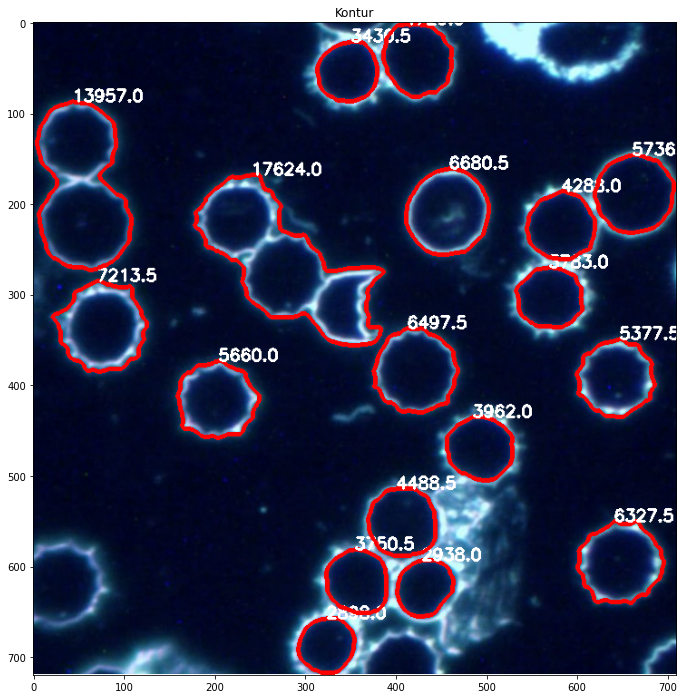

In [ ]:
##menghubungkan semua titik kontinu yang memiliki beberapa warna atau intensitas.
image_contorus = image_origin.copy()
count = 0
# area = []

# mencari kontur
contours,_ = cv2.findContours(image_edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
for cnt in contours:
  if cv2.contourArea(cnt) >= 800:  
    count = count + 1
    # area.append(cv2.contourArea(cnt))
    # jika area kontur lebih dari 800 piksel, baru konturnya digambar
    cv2.drawContours(image_contorus,[cnt], -1, (255,0,0), 3)  
    cv2.putText(image_contorus, format(cv2.contourArea(cnt)), (int(cnt[0][0][0]), int(cnt[0][0][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.60, (255, 255, 255), 2)

# tampilkan gambar yang sudah diberi kontur tersebut
print("Jumlah Bacteri Sempurna :"+ str((count)))

plt.figure(figsize = (20,12))
plt.title('Kontur')
plt.imshow(image_contorus)

In [ ]:
# image_contorus = image_origin.copy()
# count = 0

# # mencari kontur
# contours,_ = cv2.findContours(image_edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
 

# # jika area kontur lebih dari 800 piksel, baru konturnya digambar
# cv2.drawContours(image_contorus,contours, 53, (255,0,0), 3)  
# cv2.putText(image_contorus, "{:.0f}".format(cv2.contourArea(cnt)), (int(cnt[0][0][0]), int(cnt[0][0][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)

# # tampilkan gambar yang sudah diberi kontur tersebut
# print(len(contours))
# plt.figure(figsize = (20,12))
# plt.title('Kontur')
# plt.imshow(image_contorus)

## 2. Jumlah keseluruhan koloni pada bacteria ?